In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv("C:/Users/hp/House_Rent_Dataset.csv")

In [4]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [7]:
## Checking for any null values:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [8]:
## Checking for duplicated Rows 
duplicated_rows=df[df.duplicated()]
print(f'No of Duplicated Rows Present in the dataset: {duplicated_rows.shape[0]}')

No of Duplicated Rows Present in the dataset: 0


In [9]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
num_feature.remove('Rent')
print(num_feature)

['BHK', 'Size', 'Bathroom']


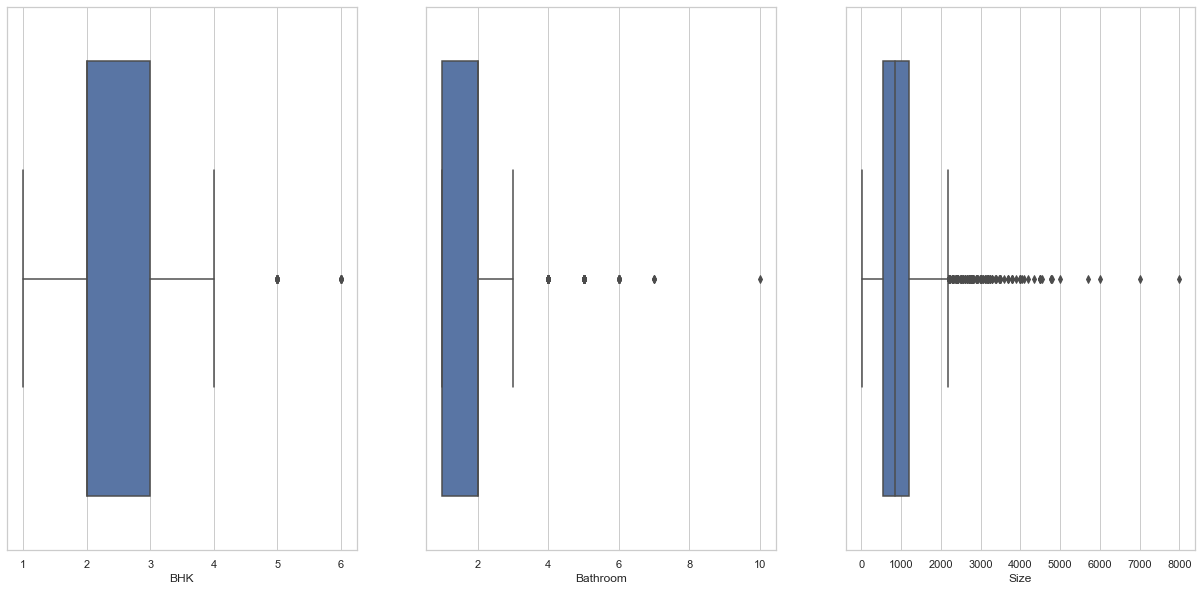

In [10]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 10))
fig.subplots_adjust(right=1.5)

plt.subplot(1, 3, 1)
sns.boxplot(df['BHK'])

plt.subplot(1, 3, 2)
sns.boxplot(df['Bathroom'])

plt.subplot(1, 3, 3)
sns.boxplot(df['Size'])

plt.show()

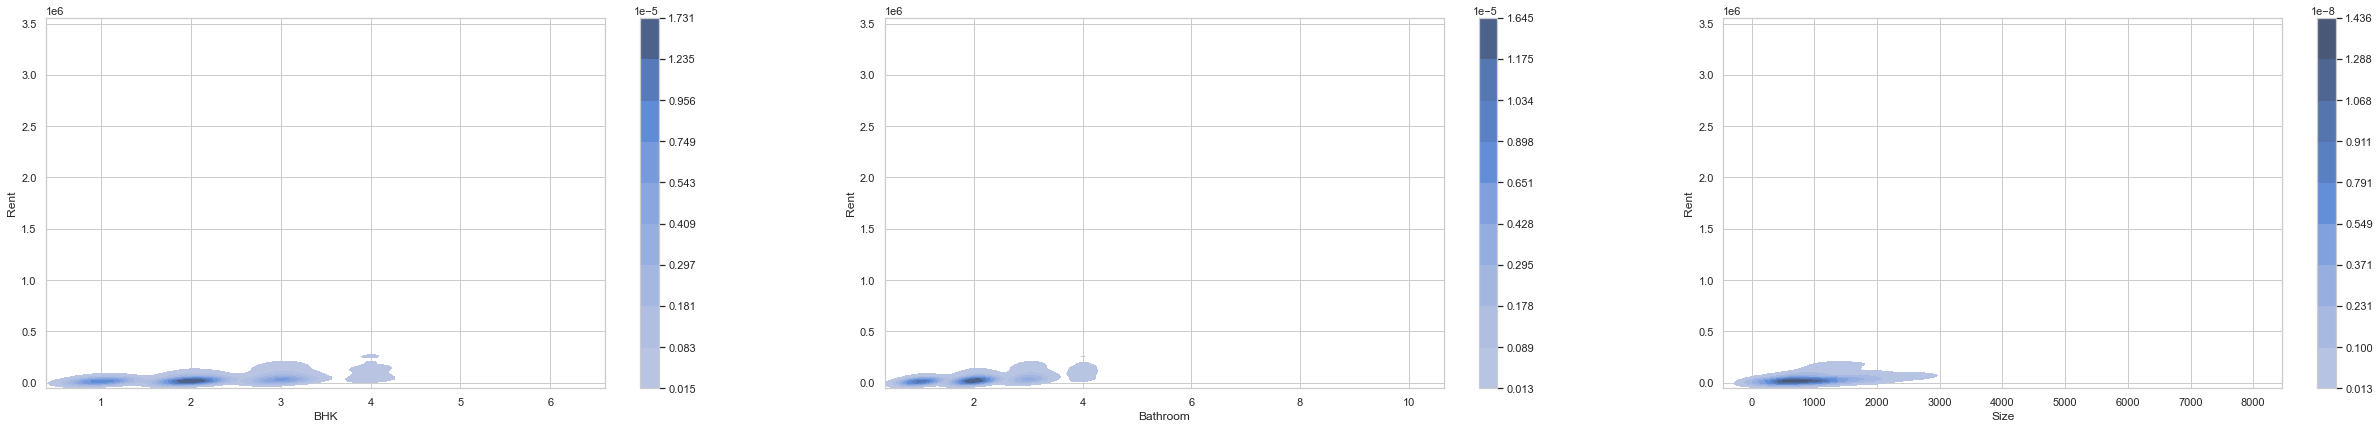

In [12]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(24, 15))
fig.subplots_adjust(right=1.5)

plt.subplot(1, 3, 1)
sns.kdeplot(df['BHK'])
plt.subplot(2, 3, 1)
sns.kdeplot(df['BHK'],df['Rent'],fill=True,cbar=True)

plt.subplot(1, 3, 2)
sns.kdeplot(df['Bathroom'])
plt.subplot(2, 3, 2)
sns.kdeplot(df['Bathroom'],df['Rent'],fill=True,cbar=True)

plt.subplot(1, 3, 3)
sns.kdeplot(df['Size'])
plt.subplot(2, 3, 3)
sns.kdeplot(df['Size'],df['Rent'],fill=True,cbar=True)
plt.show()

<AxesSubplot:xlabel='Size', ylabel='Density'>

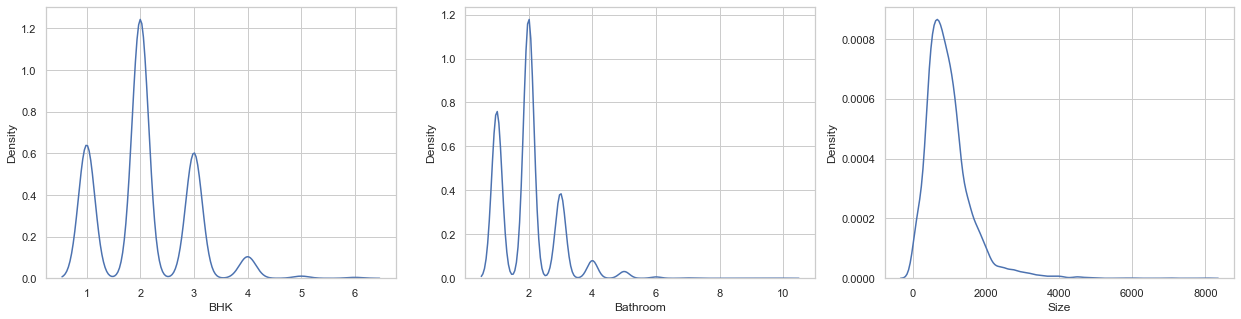

In [13]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(right=1.5)

plt.subplot(1, 3, 1)
sns.kdeplot(df['BHK'])

plt.subplot(1, 3, 2)
sns.kdeplot(df['Bathroom'])

plt.subplot(1, 3, 3)
sns.kdeplot(df['Size'])

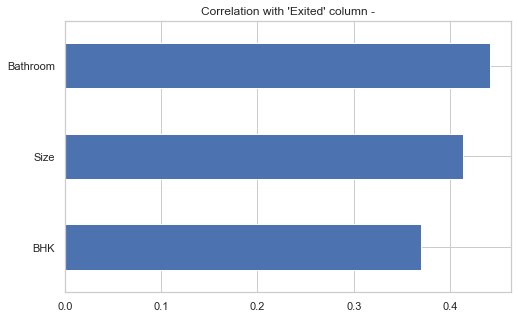

In [14]:
plt.figure(figsize=(8, 5))
X = df.drop('Rent', axis=1)
X.corr(method='spearman')
X.corrwith(df['Rent']).plot(kind='barh', title="Correlation with 'Exited' column -")
plt.show()

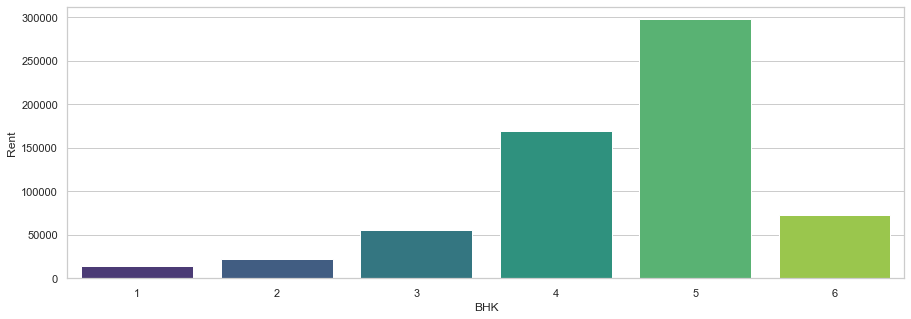

In [15]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(x=df['BHK'].sort_values(ascending=True), 
                 y=df['Rent'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

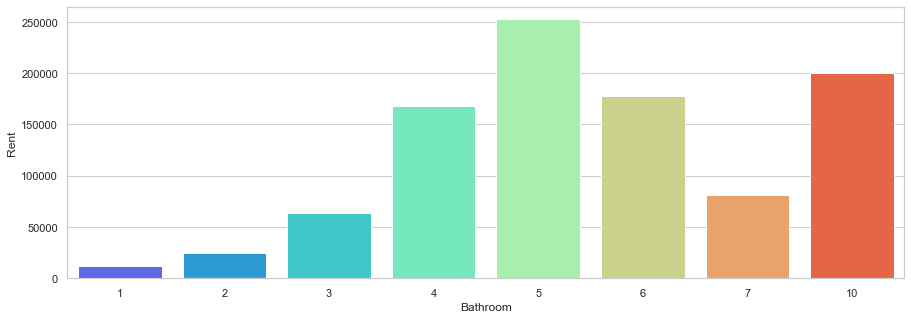

In [16]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(x=df['Bathroom'].sort_values(ascending=True), 
                 y=df['Rent'], 
                 palette='rainbow',
                 ci = None)
plt.ylabel('Rent');

In [17]:
cat_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_feature)

['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']


In [18]:
## Selecting Feature with Less no of Categories:
cat_1=[feature for feature in cat_feature if len(df[feature].unique())<25]
print(cat_1)
cat_2=[feature for feature in cat_feature if len(df[feature].unique())>25 ]
print(cat_2)

['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
['Posted On', 'Floor', 'Area Locality']


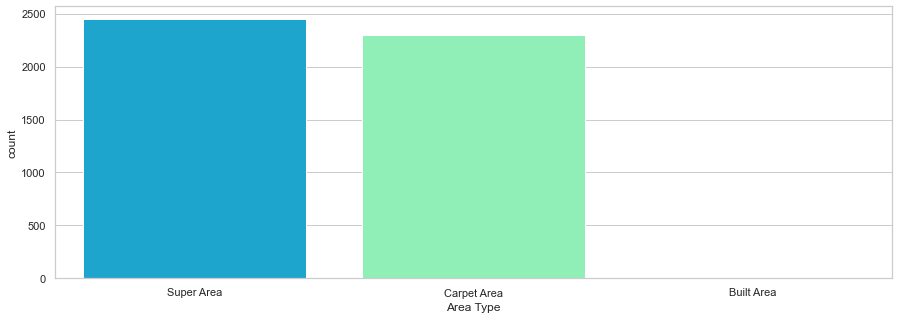

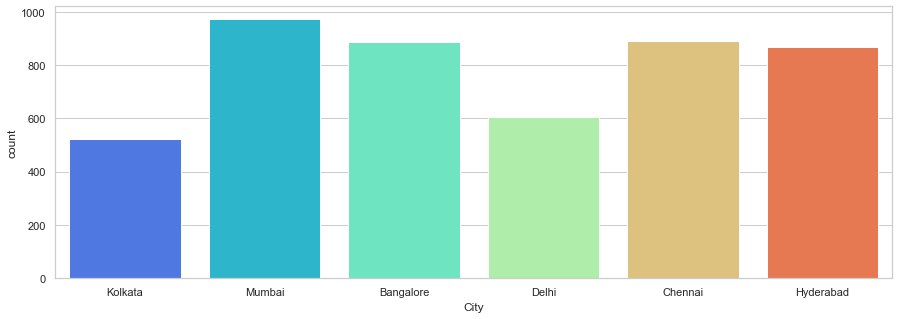

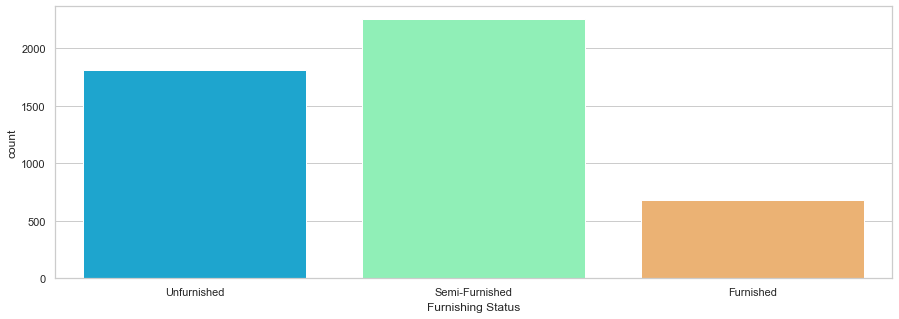

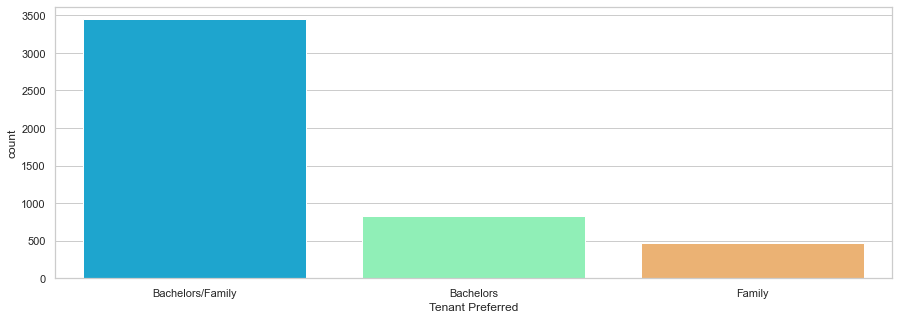

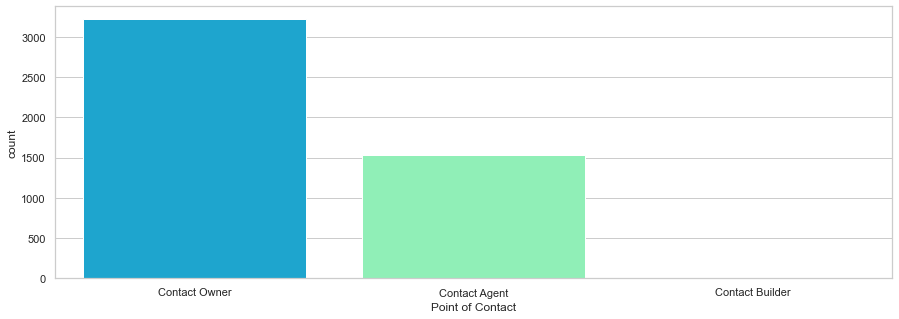

In [19]:
for feature in cat_1:
    fig=plt.figure(figsize=(15,5))
    sns.countplot(df[feature],palette='rainbow')
    plt.show()


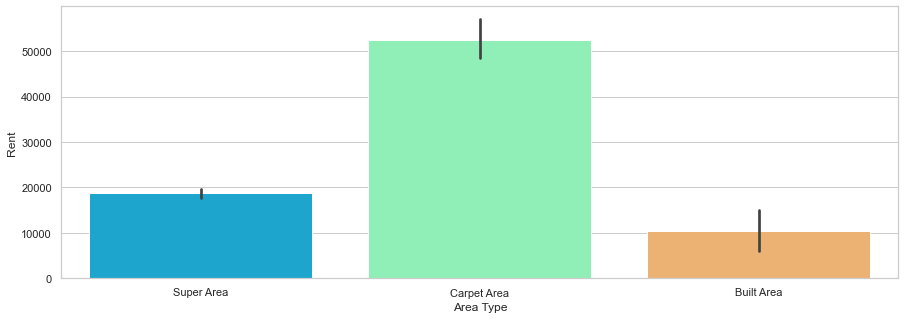

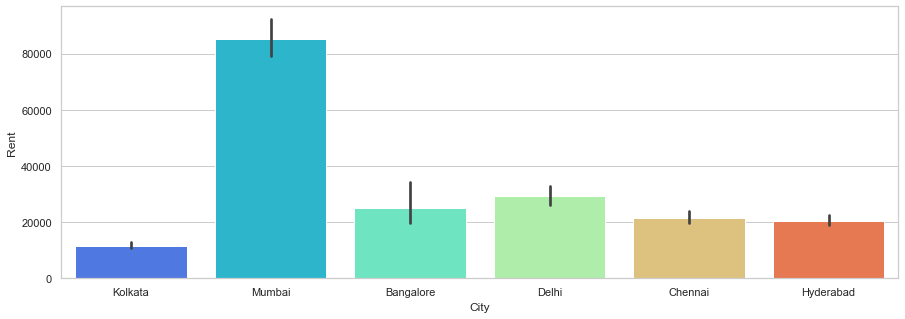

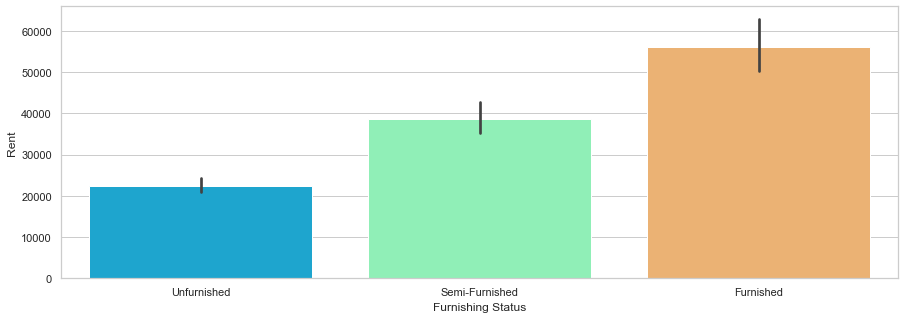

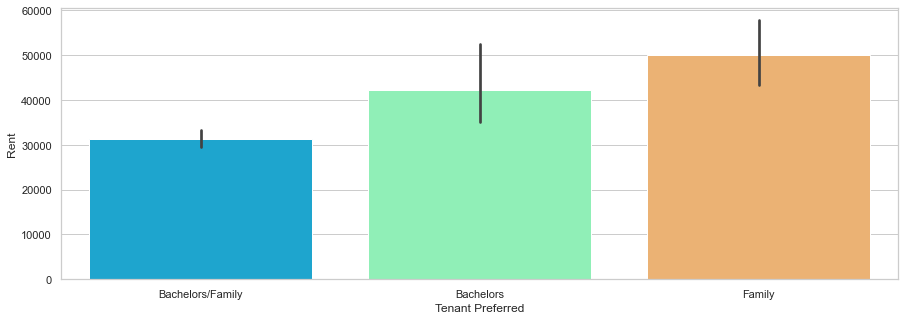

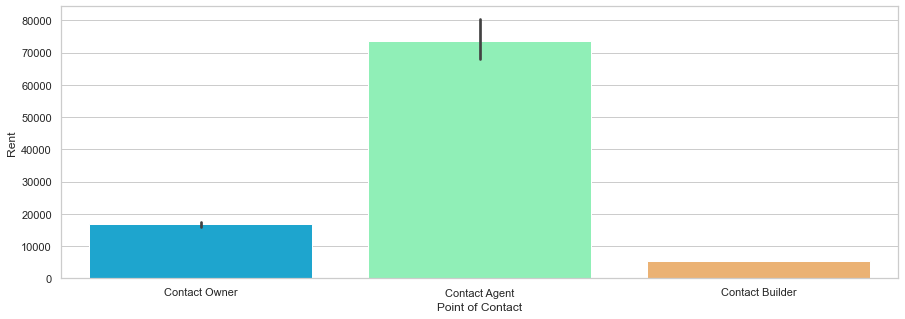

In [20]:
for feature in cat_1:
    fig=plt.figure(figsize=(15,5))
    sns.barplot(x=df[feature],y=df["Rent"],palette='rainbow')
    plt.show()

In [21]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [22]:
df['Posted On'] = pd.to_datetime(df['Posted On'])
df['month posted'] = df['Posted On'].dt.month
df['day posted'] = df['Posted On'].dt.day
df['day of week posted'] = df['Posted On'].dt.day_of_week
df['quarter poster'] = df['Posted On'].dt.quarter

df.drop('Posted On', axis = 1, inplace= True)

In [23]:
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,month posted,day posted,day of week posted,quarter poster
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18,2,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13,4,2
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16,0,2
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,4,7,3,2
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,9,5,0,3


In [24]:
## Dealing with Floor Feature
df['Floor']=df['Floor'].str[0]
df['Floor']=df['Floor'].map({'L':-1,'G':0,"U":0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9})

In [25]:
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,month posted,day posted,day of week posted,quarter poster
0,2,10000,1100,0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18,2,2
1,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13,4,2
2,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16,0,2
3,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,4,7,3,2
4,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,9,5,0,3


In [26]:
df.drop('Area Locality',axis=1,inplace=True)

In [27]:
df = df[~df['Point of Contact'].str.contains("Contact Builder")]

In [28]:
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,month posted,day posted,day of week posted,quarter poster
0,2,10000,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18,2,2
1,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13,4,2
2,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16,0,2
3,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,4,7,3,2
4,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,9,5,0,3


In [29]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [30]:
features = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
for feature in features:
    df = one_hot_encode(df, feature)

In [31]:
df.head()

,BHK,Rent,Size,Floor,Bathroom,month posted,day posted,day of week posted,quarter poster,Carpet Area,...,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Semi-Furnished,Unfurnished,Bachelors/Family,Family,Contact Owner
0,2,10000,1100,0,2,5,18,2,2,0,...,0,0,0,1,0,0,1,1,0,1
1,2,20000,800,1,1,5,13,4,2,0,...,0,0,0,1,0,1,0,1,0,1
2,2,17000,1000,1,1,5,16,0,2,0,...,0,0,0,1,0,1,0,1,0,1
3,2,10000,800,1,1,4,7,3,2,0,...,0,0,0,1,0,0,1,1,0,1
4,2,7500,850,1,1,9,5,0,3,1,...,0,0,0,1,0,0,1,0,0,1


In [32]:
import scipy.stats as stats
def diagnostic_plot(data, col):
    fig = plt.figure(figsize=(9, 4))
    fig.subplots_adjust(right=1.5)
    
    plt.subplot(1, 2, 1)
    sns.distplot(data[col], kde=True, color='red')
    plt.title('Histogram')
    
    plt.subplot(1, 2, 2)
    stats.probplot(data[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')
    
    plt.show()

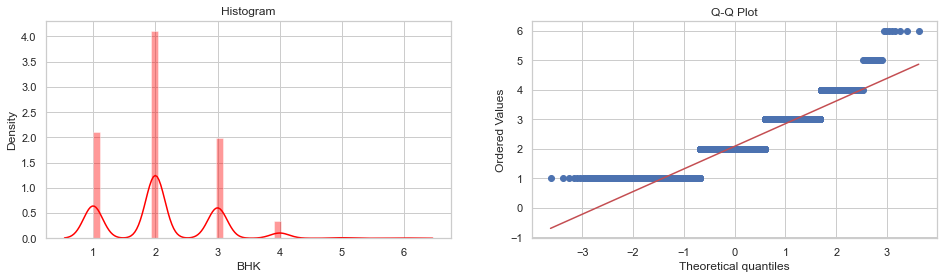

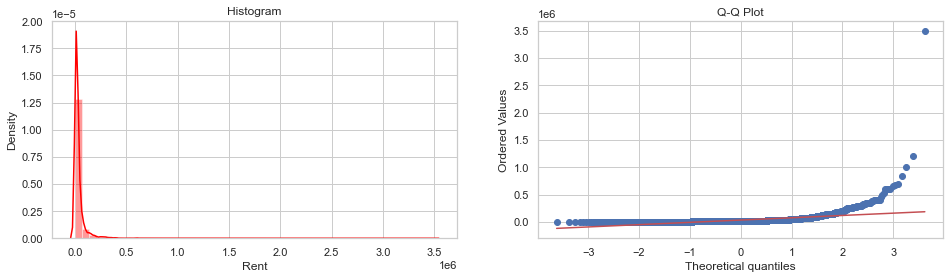

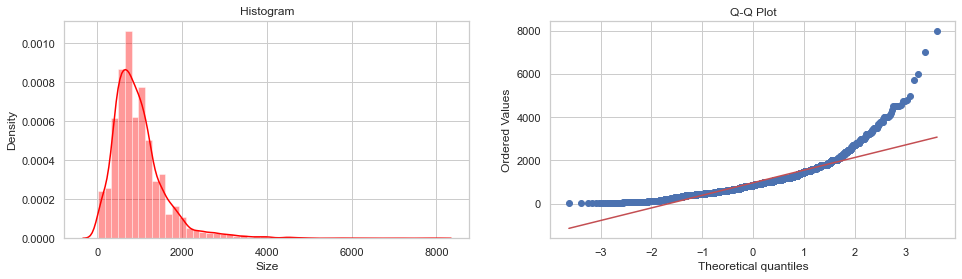

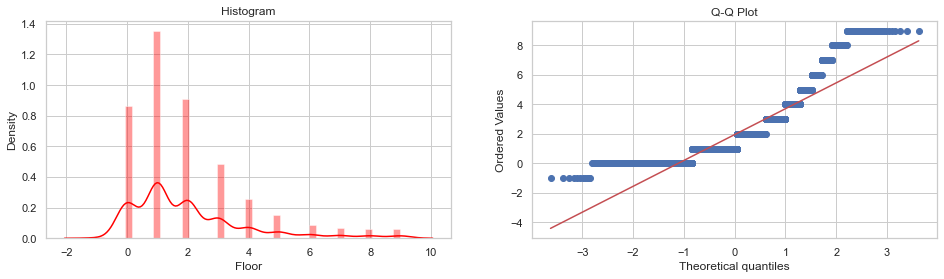

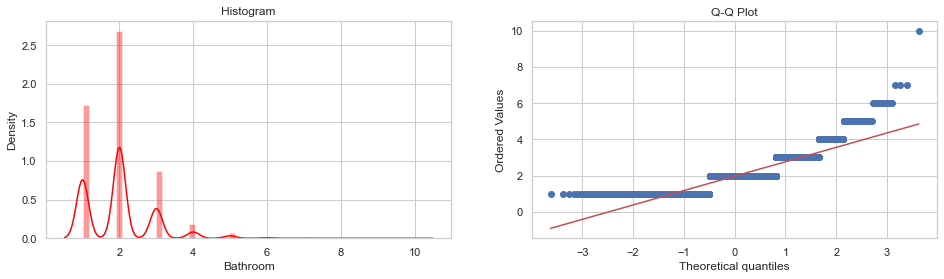

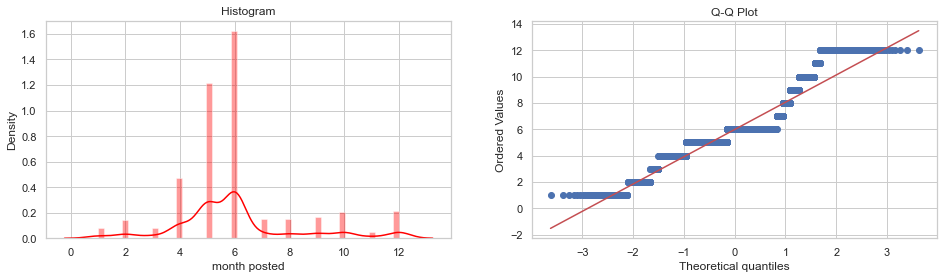

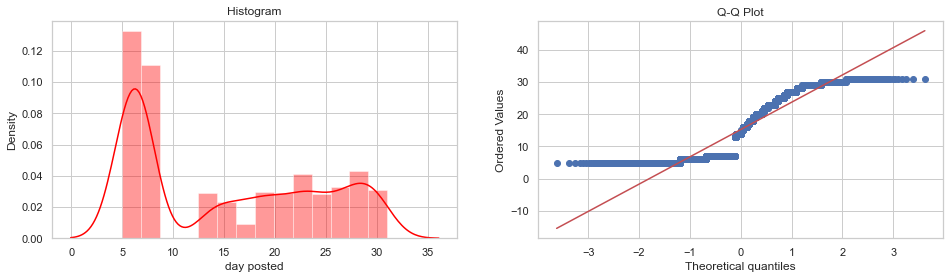

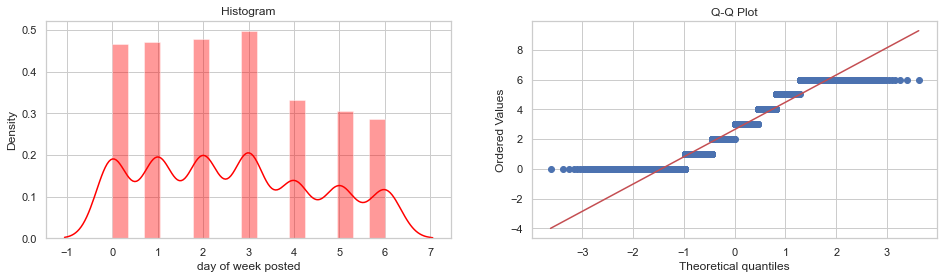

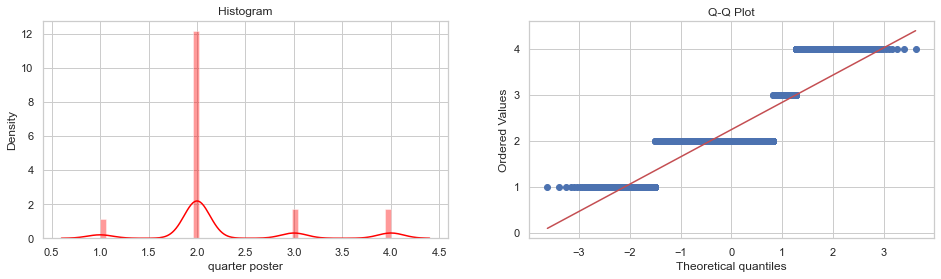

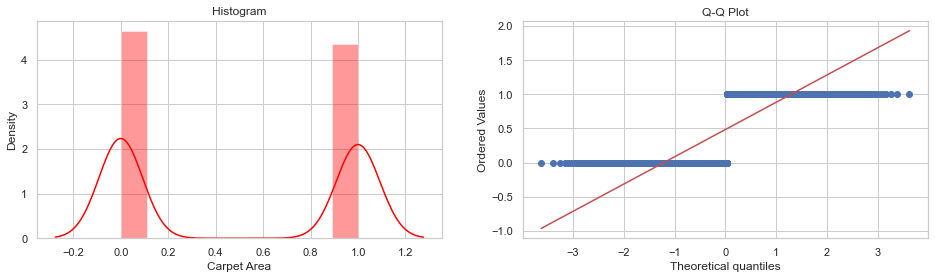

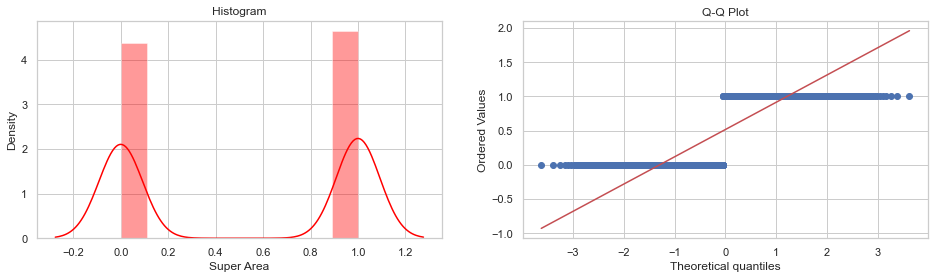

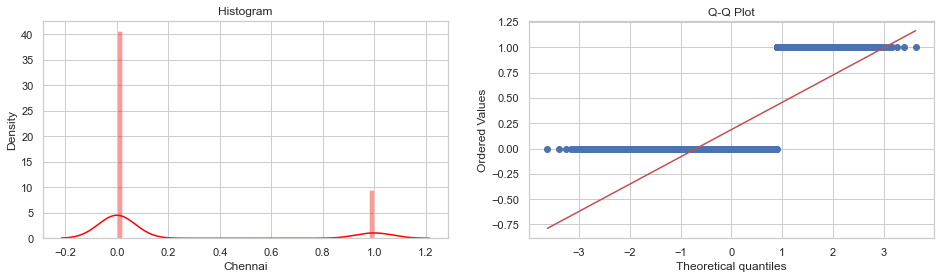

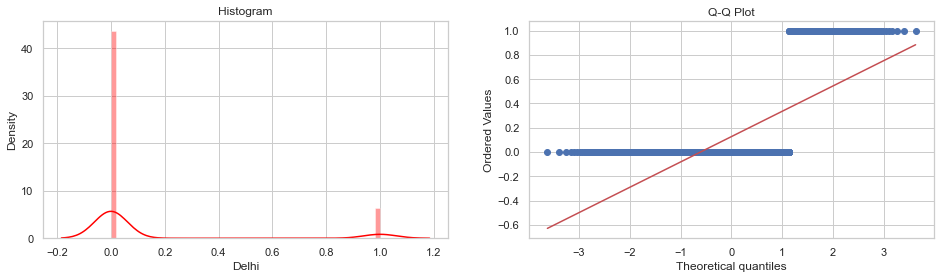

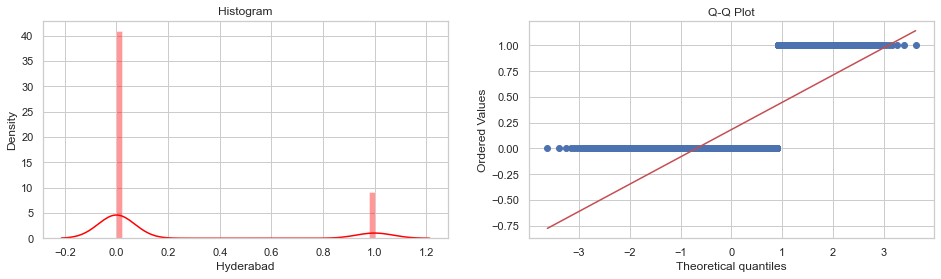

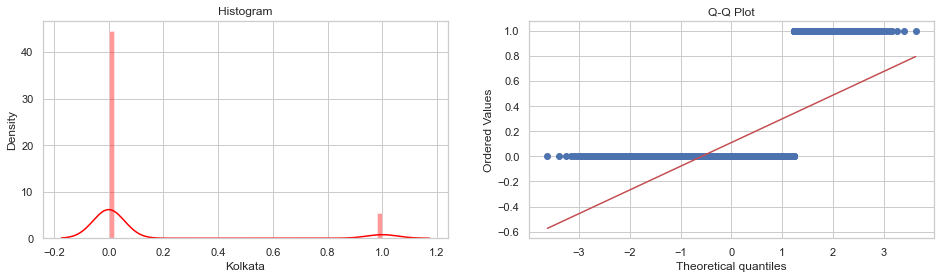

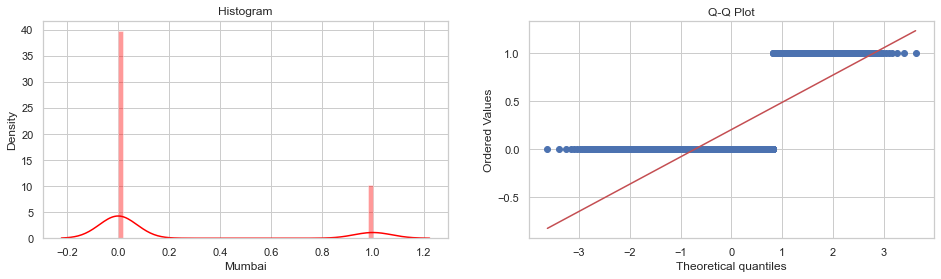

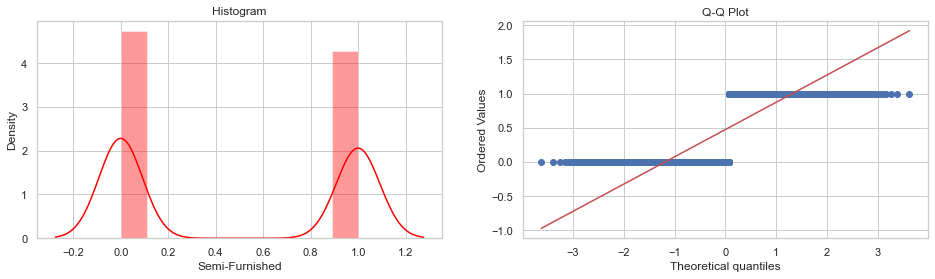

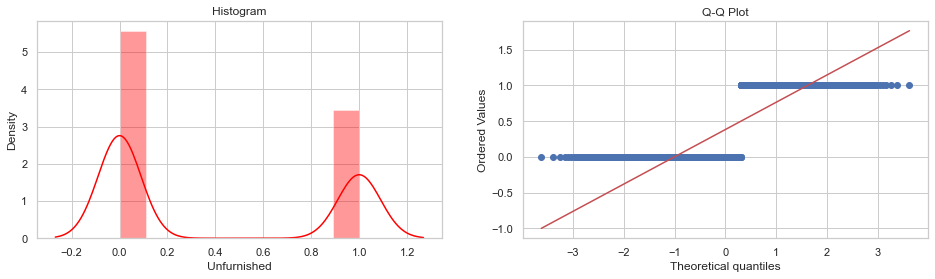

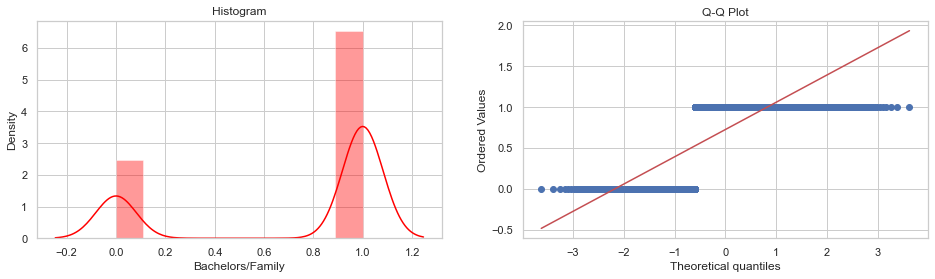

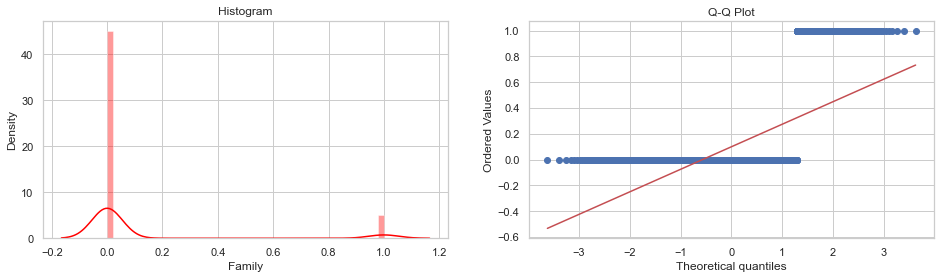

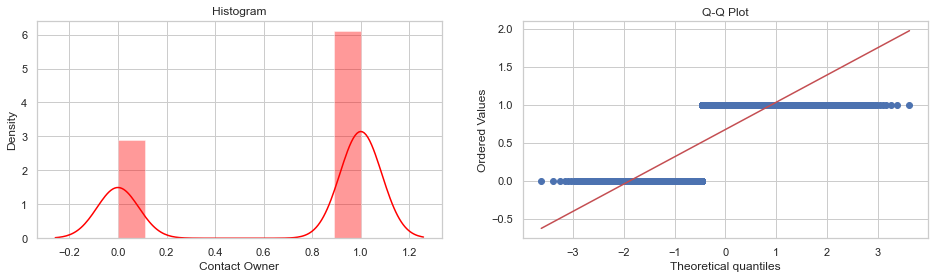

In [33]:
for feature in df.columns:
    diagnostic_plot(df, feature)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
x = df.drop('Rent', axis= 1)
df['Rent']=np.log(df['Rent'])
y=df.iloc[:,[1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [35]:
y

,Rent
0,9.210340
1,9.903488
2,9.740969
3,9.210340
4,8.922658
...,...
4741,9.615805
4742,10.275051
4743,10.463103
4744,10.714418


In [36]:
x

,BHK,Size,Floor,Bathroom,month posted,day posted,day of week posted,quarter poster,Carpet Area,Super Area,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Semi-Furnished,Unfurnished,Bachelors/Family,Family,Contact Owner
0,2,1100,0,2,5,18,2,2,0,1,0,0,0,1,0,0,1,1,0,1
1,2,800,1,1,5,13,4,2,0,1,0,0,0,1,0,1,0,1,0,1
2,2,1000,1,1,5,16,0,2,0,1,0,0,0,1,0,1,0,1,0,1
3,2,800,1,1,4,7,3,2,0,1,0,0,0,1,0,0,1,1,0,1
4,2,850,1,1,9,5,0,3,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,3,2,5,18,2,2,1,0,0,0,1,0,0,1,0,1,0,1
4742,3,2000,1,3,5,15,6,2,0,1,0,0,1,0,0,1,0,1,0,1
4743,3,1750,3,3,10,7,4,4,1,0,0,0,1,0,0,1,0,1,0,0
4744,3,1500,2,2,6,7,1,2,1,0,0,0,1,0,0,1,0,0,1,0


In [37]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (3796, 20)
X_test: (949, 20)
Y_train: (3796, 1)
Y_test: (949, 1)
